Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import pickle

Data Collection

In [2]:
diabetes_dataset = pd.read_csv('datasets\diabetes_prediction_dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8004\1926933068.py:1: SyntaxWarning: invalid escape sequence '\d'
  diabetes_dataset = pd.read_csv('datasets\diabetes_prediction_dataset.csv')


Analysis Of Collected Data

In [3]:
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diabetes_dataset.shape

(100000, 9)

In [5]:
diabetes_dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
diabetes_dataset.drop_duplicates(inplace=True)
diabetes_dataset.shape

(96146, 9)

In [7]:
diabetes_dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
print(diabetes_dataset.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [9]:
diabetes_dataset['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

Here :-

0 --> Non-Diabetic

1 --> Diabetic

In [10]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [11]:
diabetes_dataset['gender'] = diabetes_dataset['gender'].replace({'Other': 0, 'Male': 1, 'Female': 2})

diabetes_dataset['smoking_history'] = diabetes_dataset['smoking_history'].replace({'ever': 0, 'not current': 1, 'current': 2, 'former': 3, 'No Info': 4,'never': 5})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8004\3986132793.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_dataset['gender'] = diabetes_dataset['gender'].replace({'Other': 0, 'Male': 1, 'Female': 2})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8004\3986132793.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_dataset['smoking_history'] = diabetes_dataset['smoking_history'].replace({'ever': 0, 'not current': 1, 'current': 2, 'former': 3, 'No Info': 4,'never': 5})


In [12]:
diabetes_dataset.groupby('diabetes').mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,1.589706,39.943229,0.061314,0.030297,3.723022,26.869003,5.396936,132.818489
1,1.524287,60.925961,0.245933,0.149375,3.515798,31.997755,6.934827,194.026173


Seperating The Data & Labels

In [13]:
X = diabetes_dataset.drop(columns = 'diabetes', axis=1)
Y = diabetes_dataset['diabetes']

Train_Test_Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Training The Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_classifier = RandomForestClassifier(random_state=2)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

Accuracy Score Of The Training Data

In [17]:
X_train_prediction = rf_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9992199282333974


Accuracy Score Of The Test Data

In [18]:
X_test_prediction = rf_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9702548101924077


In [19]:
y_scores = rf_classifier.predict_proba(X_test)[:, 1]

In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

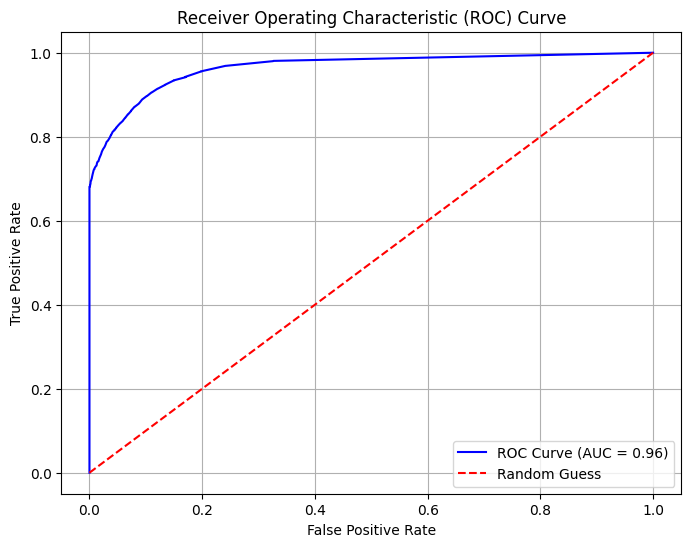

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

Our System For Predicting Diabetes

In [19]:
input_data = (1,73,0,0,3,25.91,9,160)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\python\project\Disease-Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Creating The Model

In [20]:
pickle.dump(rf_classifier, open("model/diabetes_model.pkl", "wb"))